In [68]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import cross_validation as cv

In [69]:
cancer = datasets.load_breast_cancer()
clf = LogisticRegression()
X_train, X_test, Y_train, Y_test = cv.train_test_split(cancer.data, cancer.target, test_size=0.2)

In [70]:
clf.fit(X_train,Y_train)
print(clf.predict(X_test)-Y_test)
clf.score(X_test,Y_test)

[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


0.96491228070175439

In [71]:
# We can see that the 13th pos is incorrect so the probabilty is near 0.5 
print(clf.predict_proba(X_train)[13])

[ 0.00384375  0.99615625]


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
clfKNN = KNeighborsClassifier()
clfKNN.fit(X_train,Y_train)
clfKNN.score(X_test,Y_test)


0.94736842105263153

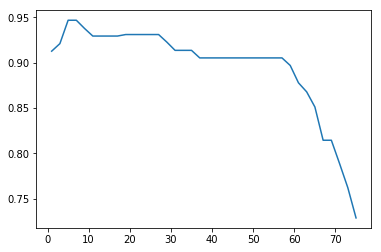

Optimnal K is  5


In [76]:
k = []
cv_score = []
for i in range(1,77,2):
    clfKNN = KNeighborsClassifier(n_neighbors= i)
    k.append(i)
    cvscr = cv.cross_val_score(clfKNN, X_test, Y_test, cv=10, scoring = 'accuracy')
    cv_score.append(cvscr.mean())
    #cv_score.append(clfKNN.score(X_test,Y_test))
plt.plot(k,cv_score)
plt.show()
print('Optimnal K is ', k[cv_score.index(max(cv_score))])

In [77]:
import operator
cd = X_train
ct = X_test
print(cd.shape)
print(ct.shape)
k = 5
scr_test = {}
for i in range(ct.shape[0]):
    scr_train_score = {}
    for j in range(cd.shape[0]):
        scr_train_score[j] = ((ct[i]-cd[j])**2).sum()
    sorted_scr_train_score = sorted(scr_train_score.items(), key=operator.itemgetter(1))[0:k]
    scr_test[i] = sorted_scr_train_score
#print(scr_test)
pred = []
for i in range(ct.shape[0]):
    temp_pred = []
    for j in range(k):
        row = scr_test[i][j][0]
        Y = Y_train[row]
        temp_pred.append(Y)
    if(temp_pred.count(1)>k//2):
        pred.append(1)
    else:
        pred.append(0)

print(abs(pred-Y_test))
print("Accuracy : ", 1-(abs(pred-Y_test).sum()/ct.shape[0]))

(455, 30)
(114, 30)
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0]
Accuracy :  0.947368421053


In [78]:
print(Y_train)

[1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1]
